# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
print(weather_api_key)

255befa0bf82e4cbec4980abde03deb5


In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#variables to hold responses
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# count
count_one = 0
set_one = 1


for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Record {count_one} of Set {set_one}:{city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------------------------------------")


Record 1 of Set 1:east london
Record 2 of Set 1:hobart
Record 3 of Set 1:busselton
Record 4 of Set 1:caraubas
Record 5 of Set 1:storforshei
Record 6 of Set 1:ushuaia
City not found. Skipping...
Record 7 of Set 1:norman wells
Record 8 of Set 1:georgetown
City not found. Skipping...
Record 9 of Set 1:cockburn town
Record 10 of Set 1:qaanaaq
Record 11 of Set 1:qeshm
City not found. Skipping...
Record 12 of Set 1:wembley
Record 13 of Set 1:rikitea
Record 14 of Set 1:albany
Record 15 of Set 1:nurota
City not found. Skipping...
Record 16 of Set 1:dikson
City not found. Skipping...
Record 17 of Set 1:fortuna
Record 18 of Set 1:novo aripuana
Record 19 of Set 1:mirnyy
Record 20 of Set 1:mwanza
Record 21 of Set 1:cape town
Record 22 of Set 1:tuktoyaktuk
Record 23 of Set 1:takahagi
City not found. Skipping...
Record 24 of Set 1:kapaa
Record 25 of Set 1:mahebourg
Record 26 of Set 1:seminole
Record 27 of Set 1:galveston
Record 28 of Set 1:rorvik
Record 29 of Set 1:saint-philippe
Record 30 of Set 1:

City not found. Skipping...
Record 20 of Set 6:batouri
Record 21 of Set 6:namwala
Record 22 of Set 6:conde
Record 23 of Set 6:sesori
Record 24 of Set 6:schmolln
Record 25 of Set 6:yayva
Record 26 of Set 6:grindavik
Record 27 of Set 6:okhotsk
Record 28 of Set 6:seoul
Record 29 of Set 6:hofn
Record 30 of Set 6:soyo
Record 31 of Set 6:provideniya
Record 32 of Set 6:nouakchott
City not found. Skipping...
Record 33 of Set 6:mackay
Record 34 of Set 6:vila franca do campo
Record 35 of Set 6:tulun
Record 36 of Set 6:auki
Record 37 of Set 6:rudbar
Record 38 of Set 6:kendari
Record 39 of Set 6:brunswick
Record 40 of Set 6:fleetwood
Record 41 of Set 6:mokhsogollokh
Record 42 of Set 6:kashi
Record 43 of Set 6:pimenta bueno
Record 44 of Set 6:padang
Record 45 of Set 6:ancud
Record 46 of Set 6:necochea
Record 47 of Set 6:san rafael del sur
Record 48 of Set 6:narsaq
City not found. Skipping...
Record 49 of Set 6:aswan
Record 1 of Set 7:northam
Record 2 of Set 7:cayenne
Record 3 of Set 7:sioux lookout

Record 40 of Set 11:mitu
Record 41 of Set 11:vila velha
City not found. Skipping...
Record 42 of Set 11:gari
Record 43 of Set 11:porto torres
Record 44 of Set 11:casper
Record 45 of Set 11:gamba
Record 46 of Set 11:kyabe
Record 47 of Set 11:rabat
Record 48 of Set 11:labrea
Record 49 of Set 11:tabou
Record 1 of Set 12:debno
Record 2 of Set 12:bonthe
Record 3 of Set 12:kamenka
City not found. Skipping...
Record 4 of Set 12:mozarlandia
Record 5 of Set 12:batagay-alyta
Record 6 of Set 12:oktyabrskoye
Record 7 of Set 12:lompoc
City not found. Skipping...
Record 8 of Set 12:aktyubinskiy
Record 9 of Set 12:bad zwischenahn
Record 10 of Set 12:jiaocheng
Record 11 of Set 12:omboue
City not found. Skipping...
Record 12 of Set 12:mananjary
Record 13 of Set 12:libertador general san martin
Record 14 of Set 12:bom sucesso
------------------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#dictionary for making df
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [11]:
#creating and veiwing df
weatherdf = pd.DataFrame(weather_dict)
weatherdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,east london,40,IS,1609441748,73,65.00,-15.00,21.20,6.93
1,hobart,90,AU,1609441728,82,-42.88,147.33,55.40,3.11
2,busselton,0,AU,1609441749,82,-33.65,115.33,62.01,12.73
3,caraubas,40,BR,1609441749,47,-5.79,-37.56,96.80,18.34
4,storforshei,75,NO,1609441749,58,66.40,14.52,30.20,6.93


In [25]:
#saving weatherdf to csv for part 2
weatherdf.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
# In my data we have no examples of humidity over 100
muy_humedo = weatherdf[(weatherdf.Humidity == "100")]
muy_humedo.head()

C:\Users\matth\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

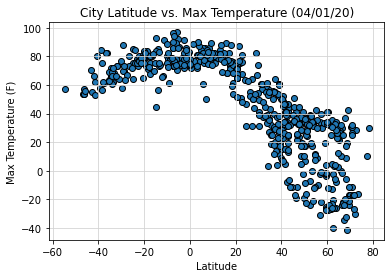

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(weatherdf["Lat"],weatherdf["Max Temp"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()
plt.savefig("lat_vs_temp.png")
# We see higher temperatures in cities located in negative and near zero latitudes

## Latitude vs. Humidity Plot

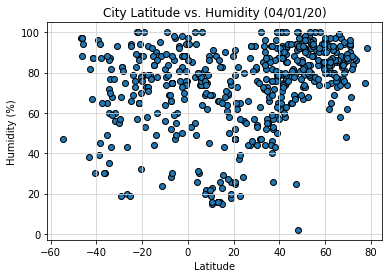

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(weatherdf["Lat"],weatherdf["Humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()
plt.savefig("Lat_vs_Humidity.png")
# There is no noticible trends between lat and humidity, however there is a small cluster in the upper right hand corner.

## Latitude vs. Cloudiness Plot

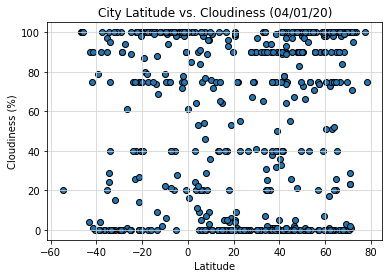

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(weatherdf["Lat"],weatherdf["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()
plt.savefig("Lat_vs_Cloudiness.png")
# There is no noticible trends displayed based on the latitude vs cloudiness

## Latitude vs. Wind Speed Plot

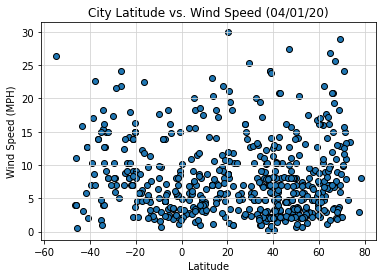

<Figure size 432x288 with 0 Axes>

In [16]:
#comparing wind speeds in different latitudes
plt.scatter(weatherdf["Lat"],weatherdf["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()
plt.savefig("Lat_vs_Windiness.png")
# There are no noticble trends

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

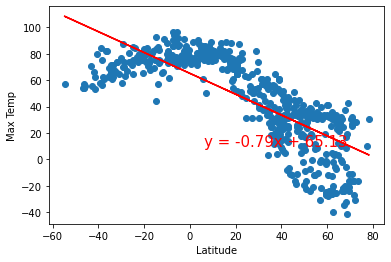

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("Temp_vs_lat_LR.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

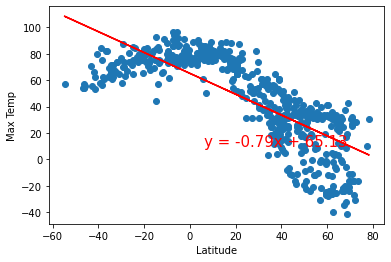

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Max Temp']
rvalue = '0.6082708688906918'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("Temp_vs_Lat_LR_SH.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

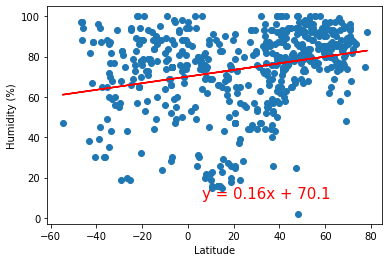

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("NH_Humidity_vs_Lat_LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

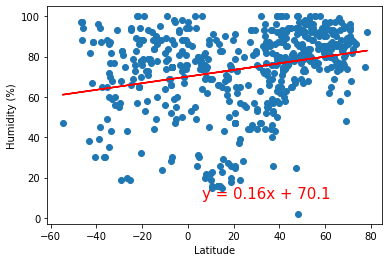

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Humidity']
rvalue = '0.014985174297345524'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("SH_Humidity_vs_Lat_LR.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

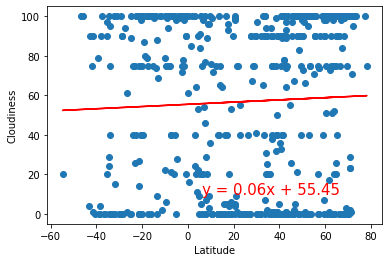

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Cloudiness']
rvalue = '0.0020898727664228514'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("NH_Cloudiness_vs_Lat_LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

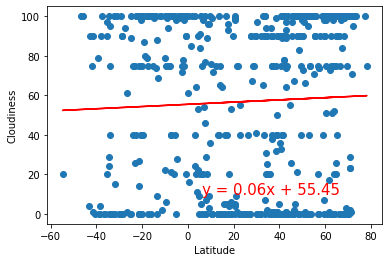

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Cloudiness']
rvalue = '0.0035263772085582894'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("SH_Cloudiness_vs_Lat_LR.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

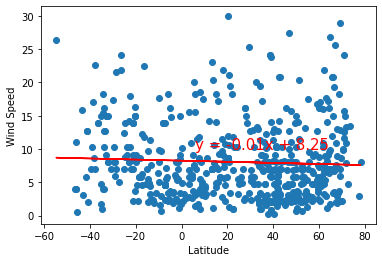

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("NH_Windiness_vs_Lat_LR.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

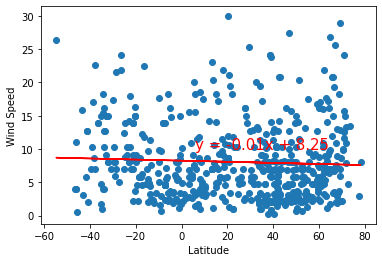

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = weatherdf["Lat"]
y_values = weatherdf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("SH_Windiness_vs_Lat_LR.png")